# 생활이동 자치구(작은거) 그래프로 표현하기

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx
from pyvis.network import Network

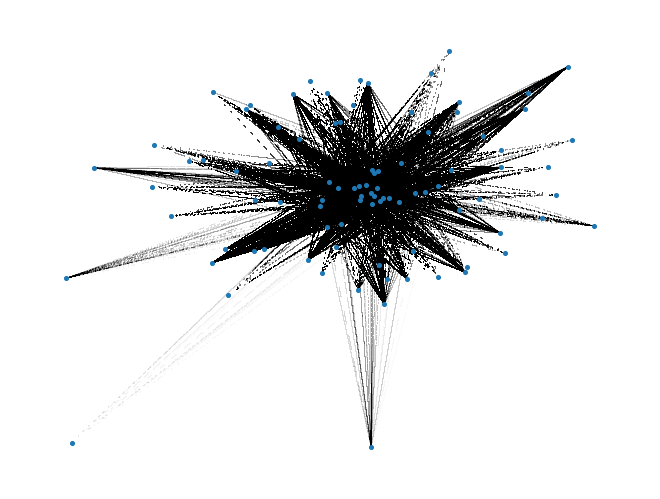

In [13]:
with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv", encoding='cp949') as f:
    data = pd.read_csv(f)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

graph = nx.from_pandas_edgelist(data, source='출발 시군구 코드', target='도착 시군구 코드', edge_attr='이동인구(합)', create_using=nx.MultiDiGraph())
nx.draw_spring(graph, node_size=7, arrows=False, width=0.001,)

plt.show()


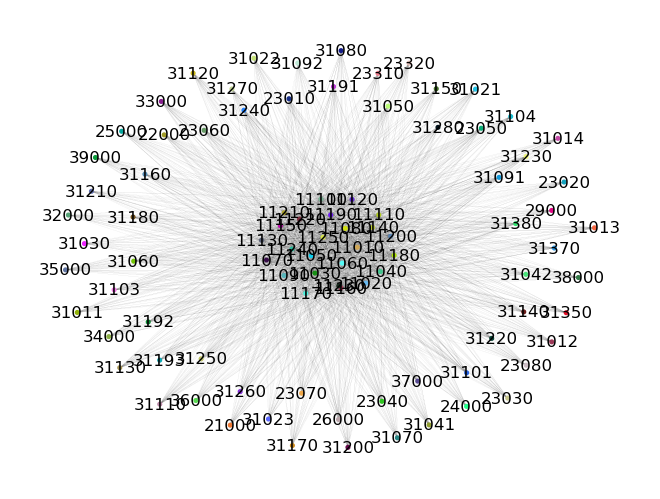

In [5]:
import random


with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

an = data['도착 시군구 코드']
an = an.drop_duplicates()

color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
nx.draw(
    graph,
    with_labels=True,
    node_color=color,
    node_size=7,
    arrows=False,
    width=0.01,
    pos=nx.spring_layout(graph)
)

plt.axis('off')
plt.show()